In [21]:
# Import all the necessary libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sbn
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv('oldmatches.csv')
display(data.head())

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,E0,9/8/2019,Liverpool,Norwich,4.0,1.0,H
1,E0,10/8/2019,West Ham,Man City,0.0,5.0,A
2,E0,10/8/2019,Bournemouth,Sheffield United,1.0,1.0,D
3,E0,10/8/2019,Burnley,Southampton,3.0,0.0,H
4,E0,10/8/2019,Crystal Palace,Everton,0.0,0.0,D


C:\Users\Dell\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FTHG', ylabel='Density'>

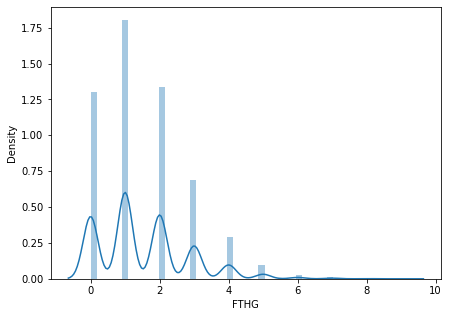

In [23]:
plt.figure(figsize=(7,5))
sbn.distplot(data["FTHG"])

C:\Users\Dell\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='FTHG', ylabel='count'>

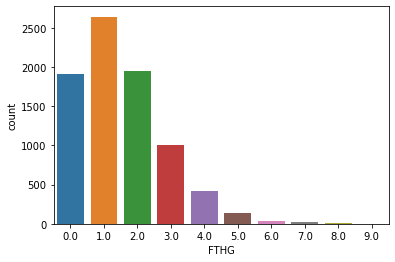

In [24]:
sbn.countplot(data["FTHG"])

<AxesSubplot:xlabel='FTHG', ylabel='FTAG'>

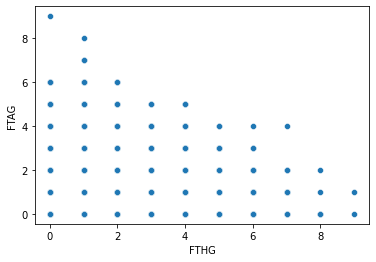

In [25]:
sbn.scatterplot(x="FTHG", y="FTAG", data = data)

In [26]:
data.sort_values("FTHG", ascending = False).head(20)

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
7130,E0,22/11/09,Tottenham,Wigan,9.0,1.0,H
2307,E0,4/3/1995,Man United,Ipswich,9.0,0.0,H
7378,E0,9/5/2010,Chelsea,Wigan,8.0,0.0,H
54,E0,21/09/2019,Man City,Watford,8.0,0.0,H
7789,E0,28/08/11,Man United,Arsenal,8.0,2.0,H
4038,E0,19/09/99,Newcastle,Sheffield Weds,8.0,0.0,H
6618,E0,11/5/2008,Middlesbrough,Man City,8.0,1.0,H
7360,E0,25/04/10,Chelsea,Stoke,7.0,0.0,H
2945,E0,16/11/96,Everton,Southampton,7.0,1.0,H
7994,E0,4/2/2012,Arsenal,Blackburn,7.0,1.0,H


In [27]:
data.describe()

,FTHG,FTAG
count,8144.000000,8144.000000
mean,1.523821,1.124877
std,1.302440,1.126964
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,9.000000,9.000000


In [28]:
data.isnull().sum()

Unnamed: 0      0
Date            0
HomeTeam        0
AwayTeam        0
FTHG          380
FTAG          380
FTR           380
dtype: int64

In [29]:
# checking if there is a nan values in our data
# data.isnull().values.any()
# count them
# data.isnull().sum().sum()
# display all nan values
# print(data[data.isna().any(axis=1)])

In [30]:
data = data.dropna()
data.head()

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,E0,9/8/2019,Liverpool,Norwich,4.0,1.0,H
1,E0,10/8/2019,West Ham,Man City,0.0,5.0,A
2,E0,10/8/2019,Bournemouth,Sheffield United,1.0,1.0,D
3,E0,10/8/2019,Burnley,Southampton,3.0,0.0,H
4,E0,10/8/2019,Crystal Palace,Everton,0.0,0.0,D


In [31]:
data.isnull().sum()

Unnamed: 0    0
Date          0
HomeTeam      0
AwayTeam      0
FTHG          0
FTAG          0
FTR           0
dtype: int64

In [32]:
winner = []
for i in range (len(data["HomeTeam"])):
    if data ["FTHG"][i] > data ["FTAG"][i]:
        winner.append(data["HomeTeam"][i])
    elif data ["FTHG"][i] < data ["FTAG"][i]:
        winner.append(data["AwayTeam"][i])
    else:
        winner.append("Draw")
data["winningTeam"] = winner

# adding goal difference column
data["GoalDifference"] = np.absolute(data["FTHG"] - data["FTAG"])

data.head()

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,winningTeam,GoalDifference
0,E0,9/8/2019,Liverpool,Norwich,4.0,1.0,H,Liverpool,3.0
1,E0,10/8/2019,West Ham,Man City,0.0,5.0,A,Man City,5.0
2,E0,10/8/2019,Bournemouth,Sheffield United,1.0,1.0,D,Draw,0.0
3,E0,10/8/2019,Burnley,Southampton,3.0,0.0,H,Burnley,3.0
4,E0,10/8/2019,Crystal Palace,Everton,0.0,0.0,D,Draw,0.0


In [34]:
data.sort_values("GoalDifference", ascending=False).head(20)

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,winningTeam,GoalDifference
90,E0,25/10/2019,Southampton,Leicester,0.0,9.0,A,Leicester,9.0
2307,E0,4/3/1995,Man United,Ipswich,9.0,0.0,H,Man United,9.0
7130,E0,22/11/09,Tottenham,Wigan,9.0,1.0,H,Tottenham,8.0
4038,E0,19/09/99,Newcastle,Sheffield Weds,8.0,0.0,H,Newcastle,8.0
7378,E0,9/5/2010,Chelsea,Wigan,8.0,0.0,H,Chelsea,8.0
54,E0,21/09/2019,Man City,Watford,8.0,0.0,H,Man City,8.0
5473,E0,11/5/2005,Arsenal,Everton,7.0,0.0,H,Arsenal,7.0
5688,E0,14/01/06,Arsenal,Middlesbrough,7.0,0.0,H,Arsenal,7.0
3820,E0,6/2/1999,Nott'm Forest,Man United,1.0,8.0,A,Man United,7.0
3312,E0,25/10/97,Man United,Barnsley,7.0,0.0,H,Man United,7.0


In [190]:
data.shape

(8144, 9)

In [204]:
# building the model
# the predecting label: the winning team column will show "2"
# if the home team has won, "0" if the away team has won, "1"
# if it was a tie.

data = data.reset_index(drop=True)
data.loc[data.winningTeam == data.HomeTeam,'winningTeam']=2
data.loc[data.winningTeam == 'Draw', 'winningTeam']=1
data.loc[data.winningTeam == data.AwayTeam, 'winningTeam']=0

data.head()

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,winningTeam,GoalDifference
0,E0,9/8/2019,Liverpool,Norwich,4.0,1.0,H,1,3.0
1,E0,10/8/2019,West Ham,Man City,0.0,5.0,A,2,5.0
2,E0,10/8/2019,Bournemouth,Sheffield United,1.0,1.0,D,0,0.0
3,E0,10/8/2019,Burnley,Southampton,3.0,0.0,H,1,3.0
4,E0,10/8/2019,Crystal Palace,Everton,0.0,0.0,D,0,0.0


In [205]:
newData = data
newData = newData.drop(["Date","Unnamed: 0","FTHG","FTAG","FTR","GoalDifference"], axis=1)
newData.head()

,HomeTeam,AwayTeam,winningTeam
0,Liverpool,Norwich,1
1,West Ham,Man City,2
2,Bournemouth,Sheffield United,0
3,Burnley,Southampton,1
4,Crystal Palace,Everton,0


In [206]:
#convert home team and away team from categorical variables to continous inputs 
# Get dummy variables
final = pd.get_dummies(newData, prefix=['HomeTeam', 'away_team'], columns=['HomeTeam', 'AwayTeam'])

# Separate X and y sets
X = final.drop(['winningTeam'], axis=1)
y = final["winningTeam"]
y = y.astype('int')

# Separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [207]:
final.head()

,winningTeam,HomeTeam_Arsenal,HomeTeam_Aston Villa,HomeTeam_Barnsley,HomeTeam_Birmingham,HomeTeam_Blackburn,HomeTeam_Blackpool,HomeTeam_Bolton,HomeTeam_Bournemouth,HomeTeam_Bradford,...,away_team_Sunderland,away_team_Swansea,away_team_Swindon,away_team_Tottenham,away_team_Watford,away_team_West Brom,away_team_West Ham,away_team_Wigan,away_team_Wimbledon,away_team_Wolves
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [208]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

score = logreg.score(X_train, y_train)
score2 = logreg.score(X_test, y_test)

print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.518
Test set accuracy:  0.511


In [209]:
# adding ranking 
# and fixtures of nex years 

ranking = pd.read_csv("ranking.csv")
fixtures = pd.read_csv("fixtures.csv")

# listing matches
predSet = []

In [210]:

# Create new columns with ranking position of each team
fixtures.insert(1, 'first_position', fixtures['Home Team'].map(ranking.set_index('team')['Position']))
fixtures.insert(2, 'second_position', fixtures['Away Team'].map(ranking.set_index('team')['Position']))


In [211]:
fixtures.tail()

,Round Number,first_position,second_position,Date,Location,Home Team,Away Team,Result
375,38,1,15,23/05/2021 16:00,Anfield,Liverpool,Crystal Palace,NaN
376,38,2,9,23/05/2021 16:00,Etihad Stadium,Man City,Everton,NaN
377,38,12,21,23/05/2021 16:00,Bramall Lane,Sheffield Utd,Burnley,NaN
378,38,16,18,23/05/2021 16:00,London Stadium,West Ham,Southampton,NaN
379,38,6,4,23/05/2021 16:00,Molineux Stadium,Wolves,Man United,NaN


In [212]:
fixtures.isnull().sum()

Round Number         0
first_position       0
second_position      0
Date                 0
Location             0
Home Team            0
Away Team            0
Result             380
dtype: int64

In [213]:
# Loop to add teams to new prediction dataset based on the ranking position of each team
for index, row in fixtures.iterrows():
    if row['first_position'] < row['second_position']:
        predSet.append({'home_team': row['Home Team'], 'away_team': row['Away Team'], 'winningTeam': None})
    else:
        predSet.append({'home_team': row['Away Team'], 'away_team': row['Home Team'], 'winningTeam': None})
        
predSet = pd.DataFrame(predSet)
backup_pred_set = predSet

predSet.head()

,home_team,away_team,winningTeam
0,Arsenal,Fulham,None
1,Man United,Burnley,None
2,Man City,Aston Villa,None
3,Crystal Palace,Southampton,None
4,Liverpool,Leeds,None


In [214]:
# Get dummy variables and drop winning_team column
predSet = pd.get_dummies(predSet, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

# Add missing columns compared to the model's training dataset
missing_cols = set(final.columns) - set(predSet.columns)
for c in missing_cols:
    predSet[c] = 0
predSet = predSet[final.columns]

# Remove winning team column
predSet = predSet.drop(['winningTeam'], axis=1)

predSet.head()

,HomeTeam_Arsenal,HomeTeam_Aston Villa,HomeTeam_Barnsley,HomeTeam_Birmingham,HomeTeam_Blackburn,HomeTeam_Blackpool,HomeTeam_Bolton,HomeTeam_Bournemouth,HomeTeam_Bradford,HomeTeam_Brighton,...,away_team_Sunderland,away_team_Swansea,away_team_Swindon,away_team_Tottenham,away_team_Watford,away_team_West Brom,away_team_West Ham,away_team_Wigan,away_team_Wimbledon,away_team_Wolves
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [215]:
# league matches 
predictions = logreg.predict(predSet)
for i in range(fixtures.shape[0]):
    print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
    if predictions[i] == 2:
        print("Winner: " + backup_pred_set.iloc[i, 1])
    elif predictions[i] == 1:
        print("Draw")
    elif predictions[i] == 0:
        print("Winner: " + backup_pred_set.iloc[i, 0])
    print('Probability of ' + backup_pred_set.iloc[i, 1] + ' winning: ', '%.3f'%(logreg.predict_proba(predSet)[i][2]))
    print('Probability of Draw: ', '%.3f'%(logreg.predict_proba(predSet)[i][1]))
    print('Probability of ' + backup_pred_set.iloc[i, 0] + ' winning: ', '%.3f'%(logreg.predict_proba(predSet)[i][0]))
    print("")

Fulham and Arsenal
Draw
Probability of Fulham winning:  0.170
Probability of Draw:  0.499
Probability of Arsenal winning:  0.332

Burnley and Man United
Draw
Probability of Burnley winning:  0.216
Probability of Draw:  0.556
Probability of Man United winning:  0.228

Aston Villa and Man City
Winner: Man City
Probability of Aston Villa winning:  0.333
Probability of Draw:  0.331
Probability of Man City winning:  0.336

Southampton and Crystal Palace
Draw
Probability of Southampton winning:  0.262
Probability of Draw:  0.493
Probability of Crystal Palace winning:  0.245

Leeds and Liverpool
Winner: Leeds
Probability of Leeds winning:  0.371
Probability of Draw:  0.321
Probability of Liverpool winning:  0.308

West Ham and Newcastle
Draw
Probability of West Ham winning:  0.250
Probability of Draw:  0.466
Probability of Newcastle winning:  0.284

West Brom and Leicester
Draw
Probability of West Brom winning:  0.156
Probability of Draw:  0.463
Probability of Leicester winning:  0.382

Evert

Probability of Draw:  0.466
Probability of Liverpool winning:  0.284

Arsenal and Man United
Winner: Arsenal
Probability of Arsenal winning:  0.513
Probability of Draw:  0.218
Probability of Man United winning:  0.269

Newcastle and Everton
Draw
Probability of Newcastle winning:  0.285
Probability of Draw:  0.399
Probability of Everton winning:  0.316

Sheffield Utd and Man City
Draw
Probability of Sheffield Utd winning:  0.270
Probability of Draw:  0.466
Probability of Man City winning:  0.264

Brighton and Tottenham
Draw
Probability of Brighton winning:  0.186
Probability of Draw:  0.511
Probability of Tottenham winning:  0.303

Crystal Palace and Wolves
Draw
Probability of Crystal Palace winning:  0.316
Probability of Draw:  0.418
Probability of Wolves winning:  0.265

Aston Villa and Arsenal
Winner: Arsenal
Probability of Aston Villa winning:  0.333
Probability of Draw:  0.331
Probability of Arsenal winning:  0.336

Burnley and Brighton
Draw
Probability of Burnley winning:  0.216
P

Probability of Everton winning:  0.297
Probability of Draw:  0.410
Probability of Leicester winning:  0.293

Sheffield Utd and Man United
Draw
Probability of Sheffield Utd winning:  0.270
Probability of Draw:  0.466
Probability of Man United winning:  0.264

West Ham and Crystal Palace
Draw
Probability of West Ham winning:  0.250
Probability of Draw:  0.466
Probability of Crystal Palace winning:  0.284

Wolves and Chelsea
Draw
Probability of Wolves winning:  0.228
Probability of Draw:  0.494
Probability of Chelsea winning:  0.277

Tottenham and Liverpool
Draw
Probability of Tottenham winning:  0.350
Probability of Draw:  0.382
Probability of Liverpool winning:  0.267

West Brom and Man City
Draw
Probability of West Brom winning:  0.156
Probability of Draw:  0.463
Probability of Man City winning:  0.382

Sheffield Utd and Brighton
Draw
Probability of Sheffield Utd winning:  0.270
Probability of Draw:  0.466
Probability of Brighton winning:  0.264

Burnley and Wolves
Draw
Probability of 

Probability of Leicester winning:  0.245

Man United and Liverpool
Winner: Man United
Probability of Man United winning:  0.600
Probability of Draw:  0.175
Probability of Liverpool winning:  0.225

Crystal Palace and Man City
Draw
Probability of Crystal Palace winning:  0.316
Probability of Draw:  0.418
Probability of Man City winning:  0.265

Sheffield Utd and Tottenham
Draw
Probability of Sheffield Utd winning:  0.270
Probability of Draw:  0.466
Probability of Tottenham winning:  0.264

Burnley and West Ham
Draw
Probability of Burnley winning:  0.216
Probability of Draw:  0.556
Probability of West Ham winning:  0.228

West Brom and Wolves
Draw
Probability of West Brom winning:  0.156
Probability of Draw:  0.463
Probability of Wolves winning:  0.382

Fulham and Brighton
Draw
Probability of Fulham winning:  0.170
Probability of Draw:  0.499
Probability of Brighton winning:  0.332

Burnley and Aston Villa
Draw
Probability of Burnley winning:  0.216
Probability of Draw:  0.556
Probabilit

Probability of West Brom winning:  0.228

Fulham and Sheffield Utd
Draw
Probability of Fulham winning:  0.170
Probability of Draw:  0.499
Probability of Sheffield Utd winning:  0.332

Everton and Liverpool
Draw
Probability of Everton winning:  0.297
Probability of Draw:  0.410
Probability of Liverpool winning:  0.293

Newcastle and Man United
Draw
Probability of Newcastle winning:  0.285
Probability of Draw:  0.399
Probability of Man United winning:  0.316

Southampton and Chelsea
Draw
Probability of Southampton winning:  0.262
Probability of Draw:  0.493
Probability of Chelsea winning:  0.245

West Ham and Tottenham
Draw
Probability of West Ham winning:  0.250
Probability of Draw:  0.466
Probability of Tottenham winning:  0.284

Leeds and Wolves
Winner: Leeds
Probability of Leeds winning:  0.371
Probability of Draw:  0.321
Probability of Wolves winning:  0.308

Man United and Chelsea
Winner: Man United
Probability of Man United winning:  0.600
Probability of Draw:  0.175
Probability o

Probability of Leeds winning:  0.371
Probability of Draw:  0.321
Probability of Man City winning:  0.308

Sheffield Utd and Arsenal
Draw
Probability of Sheffield Utd winning:  0.270
Probability of Draw:  0.466
Probability of Arsenal winning:  0.264

Tottenham and Man United
Draw
Probability of Tottenham winning:  0.350
Probability of Draw:  0.382
Probability of Man United winning:  0.267

Southampton and West Brom
Draw
Probability of Southampton winning:  0.262
Probability of Draw:  0.493
Probability of West Brom winning:  0.245

West Ham and Leicester
Draw
Probability of West Ham winning:  0.250
Probability of Draw:  0.466
Probability of Leicester winning:  0.284

Fulham and Arsenal
Draw
Probability of Fulham winning:  0.170
Probability of Draw:  0.499
Probability of Arsenal winning:  0.332

Aston Villa and Man City
Winner: Man City
Probability of Aston Villa winning:  0.333
Probability of Draw:  0.331
Probability of Man City winning:  0.336

Brighton and Chelsea
Draw
Probability of B

Probability of West Ham winning:  0.250
Probability of Draw:  0.466
Probability of West Brom winning:  0.284

Brighton and Arsenal
Draw
Probability of Brighton winning:  0.186
Probability of Draw:  0.511
Probability of Arsenal winning:  0.303

Aston Villa and Chelsea
Winner: Chelsea
Probability of Aston Villa winning:  0.333
Probability of Draw:  0.331
Probability of Chelsea winning:  0.336

Fulham and Newcastle
Draw
Probability of Fulham winning:  0.170
Probability of Draw:  0.499
Probability of Newcastle winning:  0.332

West Brom and Leeds
Draw
Probability of West Brom winning:  0.156
Probability of Draw:  0.463
Probability of Leeds winning:  0.382

Leicester and Tottenham
Draw
Probability of Leicester winning:  0.299
Probability of Draw:  0.440
Probability of Tottenham winning:  0.261

Crystal Palace and Liverpool
Draw
Probability of Crystal Palace winning:  0.316
Probability of Draw:  0.418
Probability of Liverpool winning:  0.265

Everton and Man City
Draw
Probability of Everton 